In [1]:
import pandas as pd
import fastbook
fastbook.setup_book()
import numpy as np


# Modelling
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
import seaborn as sns

from fastai.tabular.all import *
from fastbook import *

In [2]:
df = pd.read_csv('data/sales_data.csv',low_memory=False)


In [89]:
df['Transmission'].unique()

array([nan, 'Powershuttle', 'Standard', 'Powershift', 'None or Unspecified', 'Hydrostatic', 'Autoshift', 'Direct Drive', 'AutoShift'], dtype=object)

In [3]:
df.head()

,Unnamed: 0,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,0,1139246,66000,999089,3157,121,3,2004,68.0,Low,11/16/2006 0:00,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1,1139248,57000,117657,77,121,3,1996,4640.0,Low,3/26/2004 0:00,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,2,1139249,10000,434808,7009,121,3,2001,2838.0,High,2/26/2004 0:00,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operating Capacity,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1139251,38500,1026470,332,121,3,2001,3486.0,High,5/19/2011 0:00,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metric Tons",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1139253,11000,1057373,17311,121,3,2007,722.0,Medium,7/23/2009 0:00,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operating Capacity,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
checking = df.loc[[4]]
checking

,Unnamed: 0,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
4,4,1139253,11000,1057373,17311,121,3,2007,722.0,Medium,7/23/2009 0:00,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operating Capacity,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
testing = df['SalePrice']
trn = df[['SalesID','YearMade']]
trn.head()

,SalesID,YearMade
0,1139246,2004
1,1139248,1996
2,1139249,2001
3,1139251,2001
4,1139253,2007


In [58]:
testr = df.loc[[3]]
testr['saleDate']

Index(['Unnamed: 0', 'SalesID', 'SalePrice', 'MachineID', 'ModelID',
       'datasource', 'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter',
       'UsageBand', 'saledate', 'fiModelDesc', 'fiBaseModel',
       'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [59]:
testrow = df.loc[[3]]
testrow = testrow[['YearMade', 'fiSecondaryDesc', 'fiProductClassDesc','saledate',
       'ModelID', 'Track_Type', 'fiModelDesc', 'Enclosure', 'SalesID',
       'ProductSize', 'Tire_Size', 'MachineID', 'fiBaseModel',
       'Coupler_System', 'state', 'Ripper', 'Transmission']]

In [60]:
testrow.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 3 to 3
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   YearMade            1 non-null      int64 
 1   fiSecondaryDesc     0 non-null      object
 2   fiProductClassDesc  1 non-null      object
 3   saledate            1 non-null      object
 4   ModelID             1 non-null      int64 
 5   Track_Type          0 non-null      object
 6   fiModelDesc         1 non-null      object
 7   Enclosure           1 non-null      object
 8   SalesID             1 non-null      int64 
 9   ProductSize         1 non-null      object
 10  Tire_Size           0 non-null      object
 11  MachineID           1 non-null      int64 
 12  fiBaseModel         1 non-null      object
 13  Coupler_System      0 non-null      object
 14  state               1 non-null      object
 15  Ripper              0 non-null      object
 16  Transmission        0 non-null     

In [27]:
important = ['YearMade', 'fiSecondaryDesc', 'fiProductClassDesc', 'saleElapsed',
       'ModelID', 'Track_Type', 'fiModelDesc', 'Enclosure', 'SalesID',
       'ProductSize', 'Tire_Size', 'MachineID', 'fiBaseModel',
       'Coupler_System', 'state', 'saleDay', 'Ripper', 'Transmission']

In [31]:
testrows = df.loc[[3]]
main_rows = [t for t in testrows.columns if t in important]
main_rows

['SalesID',
 'MachineID',
 'ModelID',
 'YearMade',
 'fiModelDesc',
 'fiBaseModel',
 'fiSecondaryDesc',
 'ProductSize',
 'fiProductClassDesc',
 'state',
 'Enclosure',
 'Transmission',
 'Ripper',
 'Tire_Size',
 'Coupler_System',
 'Track_Type']

In [7]:

testrow = add_datepart(testrow,'saledate')


/home/fakhar/Desktop/PriceEstimator/venv/lib/python3.10/site-packages/fastai/tabular/core.py:23: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.


In [8]:
testrow = testrow[['YearMade', 'fiSecondaryDesc', 'fiProductClassDesc', 'saleElapsed',
       'ModelID', 'Track_Type', 'fiModelDesc', 'Enclosure', 'SalesID',
       'ProductSize', 'Tire_Size', 'MachineID', 'fiBaseModel',
       'Coupler_System', 'state', 'saleDay', 'Ripper', 'Transmission']]
testrow

,YearMade,fiSecondaryDesc,fiProductClassDesc,saleElapsed,ModelID,Track_Type,fiModelDesc,Enclosure,SalesID,ProductSize,Tire_Size,MachineID,fiBaseModel,Coupler_System,state,saleDay,Ripper,Transmission
3,2001,NaN,"Hydraulic Excavator, Track - 12.0 to 14.0 Metric Tons",1.305763e+09,332,NaN,PC120-6E,EROPS w AC,1139251,Small,NaN,1026470,PC120,NaN,Texas,19,NaN,NaN


In [9]:
important = ['YearMade', 'fiSecondaryDesc', 'fiProductClassDesc', 'saleElapsed',
       'ModelID', 'Track_Type', 'fiModelDesc', 'Enclosure', 'SalesID',
       'ProductSize', 'Tire_Size', 'MachineID', 'fiBaseModel',
       'Coupler_System', 'state', 'saleDay', 'Ripper', 'Transmission']

In [21]:
df = df.drop(df.columns[0],axis=1)

In [22]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3,2004,68.0,Low,11/16/2006 0:00,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3,1996,4640.0,Low,3/26/2004 0:00,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3,2001,2838.0,High,2/26/2004 0:00,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operating Capacity,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3,2001,3486.0,High,5/19/2011 0:00,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metric Tons",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3,2007,722.0,Medium,7/23/2009 0:00,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operating Capacity,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
from fastai import *
from fastai.tabular.all import *

In [24]:
years = [y for y in df['YearMade'] if y==1000]
len(years)

7645

In [34]:
df = add_datepart(df,'saledate')

/home/fakhar/Desktop/PriceEstimator/venv/lib/python3.10/site-packages/fastai/tabular/core.py:23: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.


In [26]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,66000,999089,3157,121,3,2004,68.0,Low,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,2006,11,46,16,3,320,False,False,False,False,False,False,1.163635e+09
1,1139248,57000,117657,77,121,3,1996,4640.0,Low,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,2004,3,13,26,4,86,False,False,False,False,False,False,1.080259e+09
2,1139249,10000,434808,7009,121,3,2001,2838.0,High,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operating Capacity,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004,2,9,26,3,57,False,False,False,False,False,False,1.077754e+09
3,1139251,38500,1026470,332,121,3,2001,3486.0,High,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metric Tons",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,5,20,19,3,139,False,False,False,False,False,False,1.305763e+09
4,1139253,11000,1057373,17311,121,3,2007,722.0,Medium,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operating Capacity,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009,7,30,23,3,204,False,False,False,False,False,False,1.248307e+09


In [27]:


years = [y for y in df['YearMade'] if y>2007]
len(years)

413

In [35]:
procs = [Categorify,FillMissing]

condition = (df.saleYear<2007) | (df.saleMonth < 10)
train_idx = np.where(condition)[0]
test_idx = np.where(~condition)[0]

splits = (list(train_idx), list(test_idx))

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 65 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   200000 non-null  int64  
 1   SalePrice                 200000 non-null  int64  
 2   MachineID                 200000 non-null  int64  
 3   ModelID                   200000 non-null  int64  
 4   datasource                200000 non-null  int64  
 5   auctioneerID              200000 non-null  int64  
 6   YearMade                  200000 non-null  int64  
 7   MachineHoursCurrentMeter  30491 non-null   float64
 8   UsageBand                 27565 non-null   object 
 9   fiModelDesc               200000 non-null  object 
 10  fiBaseModel               200000 non-null  object 
 11  fiSecondaryDesc           147016 non-null  object 
 12  fiModelSeries             13815 non-null   object 
 13  fiModelDescriptor         32231 non-null   o

In [38]:
numerical_features = [feature for feature in df.columns if (df[feature].dtype !='O')]

In [39]:
numerical_features = [features for features in numerical_features if features.startswith('sale')==False]

In [40]:
numerical_features

['SalesID',
 'SalePrice',
 'MachineID',
 'ModelID',
 'datasource',
 'auctioneerID',
 'YearMade',
 'MachineHoursCurrentMeter']

In [41]:
categorical_features = [feature for feature in df.columns if (df[feature].dtype =='O')]

In [42]:
categorical_features

['UsageBand',
 'fiModelDesc',
 'fiBaseModel',
 'fiSecondaryDesc',
 'fiModelSeries',
 'fiModelDescriptor',
 'ProductSize',
 'fiProductClassDesc',
 'state',
 'ProductGroup',
 'ProductGroupDesc',
 'Drive_System',
 'Enclosure',
 'Forks',
 'Pad_Type',
 'Ride_Control',
 'Stick',
 'Transmission',
 'Turbocharged',
 'Blade_Extension',
 'Blade_Width',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Hydraulics',
 'Pushblock',
 'Ripper',
 'Scarifier',
 'Tip_Control',
 'Tire_Size',
 'Coupler',
 'Coupler_System',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'Track_Type',
 'Undercarriage_Pad_Width',
 'Stick_Length',
 'Thumb',
 'Pattern_Changer',
 'Grouser_Type',
 'Backhoe_Mounting',
 'Blade_Type',
 'Travel_Controls',
 'Differential_Type',
 'Steering_Controls']

In [43]:
df.nunique()

SalesID                 200000
SalePrice                  666
MachineID               175178
ModelID                   2766
datasource                   2
                         ...  
saleIs_quarter_end           2
saleIs_quarter_start         2
saleIs_year_end              2
saleIs_year_start            1
saleElapsed               3686
Length: 65, dtype: int64

In [29]:
dep_var = 'SalePrice'



In [45]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,66000,999089,3157,121,3,2004,68.0,Low,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,2006,11,46,16,3,320,False,False,False,False,False,False,1.163635e+09
1,1139248,57000,117657,77,121,3,1996,4640.0,Low,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,2004,3,13,26,4,86,False,False,False,False,False,False,1.080259e+09
2,1139249,10000,434808,7009,121,3,2001,2838.0,High,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operating Capacity,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004,2,9,26,3,57,False,False,False,False,False,False,1.077754e+09
3,1139251,38500,1026470,332,121,3,2001,3486.0,High,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metric Tons",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,5,20,19,3,139,False,False,False,False,False,False,1.305763e+09
4,1139253,11000,1057373,17311,121,3,2007,722.0,Medium,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operating Capacity,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009,7,30,23,3,204,False,False,False,False,False,False,1.248307e+09


In [36]:
sizes = 'Large','Large/Medium', 'Medium', 'Small', 'Mini', 'Compact'

df['ProductSize'] = df['ProductSize'].astype('category')
df['ProductSize'] = df['ProductSize'].cat.set_categories(sizes, ordered=True)

In [37]:
dep_var='SalePrice'

cont,cat = cont_cat_split(df,1,dep_var=dep_var)

to = TabularPandas(df,procs,cat,cont,y_names=dep_var,splits=splits)

In [38]:
to.valid.xs

,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,MachineHoursCurrentMeter_na,Unnamed: 0,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleElapsed
5,2,343,139,27,0,0,0,2,3,1,1,2,6,1,2,1,1,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,5,1139255,1001274,4605,121,3,2004,508.0,2008,12,51,18,3,353,1.229558e+09
22,2,311,131,0,0,0,5,13,15,4,4,0,3,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,0,0,0,1,18,25,3,2,1,0,0,0,0,0,1,1,1,1,1,1,1,22,1139344,1044500,7040,121,3,2005,109.0,2007,10,43,25,3,298,1.193270e+09
30,1,430,154,10,0,39,0,19,29,4,4,0,3,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,3,0,0,0,2,18,25,3,2,1,0,0,0,0,0,1,1,1,1,1,1,1,30,1139363,871201,1263,121,3,1999,15633.0,2010,10,42,22,4,295,1.287706e+09
46,2,953,299,7,0,0,0,32,15,2,2,1,3,0,0,0,0,6,0,1,3,3,1,5,1,2,2,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,46,1139424,1011821,4818,121,3,1000,5074.0,2010,11,46,18,3,322,1.290038e+09
69,3,1147,372,27,0,0,3,60,22,6,6,0,6,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,9,1,0,0,0,0,0,0,0,0,0,0,0,0,3,2,1,1,1,1,1,1,1,69,1139484,762683,3807,121,3,2002,8421.0,2010,10,42,21,3,294,1.287619e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199933,0,591,205,29,0,0,0,49,19,5,5,0,6,0,0,0,0,8,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5,6,0,0,1,1,1,1,1,1,2,199933,1638597,1482462,4666,132,21,2001,2586.0,2007,12,49,8,5,342,1.197072e+09
199944,0,860,276,29,0,53,3,45,10,5,5,0,6,0,0,0,0,8,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,6,0,0,1,1,1,1,1,1,2,199944,1638610,1475429,22160,132,1,2001,2586.0,2008,11,47,20,3,325,1.227139e+09
199952,0,792,261,29,0,0,0,52,9,5,5,0,6,0,0,0,0,8,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,6,0,0,1,1,1,1,1,1,2,199952,1638621,1458208,4764,132,1,2001,2586.0,2007,10,41,10,2,283,1.191974e+09
199956,0,343,139,27,0,0,0,2,6,1,1,2,1,1,2,1,1,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,2,199956,1638625,1410753,4605,132,1,2001,2586.0,2008,12,50,12,4,347,1.229040e+09


In [39]:
cats = ['fiModelDesc',
                    'fiBaseModel',
                    'fiSecondaryDesc',
                    'ProductSize',
                    'fiProductClassDesc',
                    'state',
                    'Enclosure',
                    'Transmission',
                    'Ripper',
                    'Tire_Size',
                    'Coupler_System',
                    'Track_Type']
conts = ['SalesID', 'MachineID', 'ModelID', 'YearMade', 'saleDay', 'saleElapsed']
pr = [Categorify, FillMissing]
test_to = TabularPandas(testrow, procs, cats, conts, y_names=None, splits=None)

In [40]:
x = test_to.train.xs
x = x[['YearMade', 'fiSecondaryDesc', 'fiProductClassDesc', 'saleElapsed',
       'ModelID', 'Track_Type', 'fiModelDesc', 'Enclosure', 'SalesID',
       'ProductSize', 'Tire_Size', 'MachineID', 'fiBaseModel',
       'Coupler_System', 'state', 'saleDay', 'Ripper', 'Transmission']]

In [41]:
x

,YearMade,fiSecondaryDesc,fiProductClassDesc,saleElapsed,ModelID,Track_Type,fiModelDesc,Enclosure,SalesID,ProductSize,Tire_Size,MachineID,fiBaseModel,Coupler_System,state,saleDay,Ripper,Transmission
3,2001,0,1,1.305763e+09,332,0,1,1,1139251,1,0,1026470,1,0,1,19,0,0


In [38]:
to.train.y.head()

0    66000
1    57000
2    10000
3    38500
4    11000
Name: SalePrice, dtype: int32

In [39]:
ndf = pd.concat([x,to.train.y],axis=1)

In [40]:
ndf.head()

,YearMade,fiSecondaryDesc,fiProductClassDesc,saleElapsed,ModelID,Track_Type,fiModelDesc,Enclosure,SalesID,ProductSize,Tire_Size,MachineID,fiBaseModel,Coupler_System,state,saleDay,Ripper,Transmission,SalePrice
0,2004,19,57,1.163635e+09,3157,0,650,3,1139246,0,17,999089,228,0,1,16,0,0,66000
1,1996,25,60,1.080259e+09,77,0,1160,3,1139248,3,12,117657,377,0,33,26,0,0,57000
2,2001,0,37,1.077754e+09,7009,0,226,6,1139249,0,0,434808,91,1,32,26,0,0,10000
3,2001,0,8,1.305763e+09,332,0,2067,3,1139251,4,0,1026470,809,0,44,19,0,0,38500
4,2007,0,38,1.248307e+09,17311,0,2297,1,1139253,0,0,1057373,894,1,32,23,0,0,11000


In [48]:
co,ca = cont_cat_split(df)
ca

['datasource',
 'UsageBand',
 'fiModelDesc',
 'fiBaseModel',
 'fiSecondaryDesc',
 'fiModelSeries',
 'fiModelDescriptor',
 'ProductSize',
 'fiProductClassDesc',
 'state',
 'ProductGroup',
 'ProductGroupDesc',
 'Drive_System',
 'Enclosure',
 'Forks',
 'Pad_Type',
 'Ride_Control',
 'Stick',
 'Transmission',
 'Turbocharged',
 'Blade_Extension',
 'Blade_Width',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Hydraulics',
 'Pushblock',
 'Ripper',
 'Scarifier',
 'Tip_Control',
 'Tire_Size',
 'Coupler',
 'Coupler_System',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'Track_Type',
 'Undercarriage_Pad_Width',
 'Stick_Length',
 'Thumb',
 'Pattern_Changer',
 'Grouser_Type',
 'Backhoe_Mounting',
 'Blade_Type',
 'Travel_Controls',
 'Differential_Type',
 'Steering_Controls',
 'saleMonth',
 'saleDayofweek',
 'saleIs_month_end',
 'saleIs_month_start',
 'saleIs_quarter_end',
 'saleIs_quarter_start',
 'saleIs_year_end',
 'saleIs_year_start']

In [49]:
len(to.train), len(to.valid)

(190576, 9424)

In [50]:
year = [y for y in to.train.xs['YearMade'] if y>2007]
len(year)

265

In [51]:
to.classes['ProductSize']

['#na#', 'Large', 'Large/Medium', 'Medium', 'Small', 'Mini', 'Compact']

In [52]:
X_train, y_train = to.train.xs, to.train.y

X_test, y_test = to.valid.xs, to.valid.y

In [53]:

years = [y for y in X_test['YearMade'] if y>2000]
len(years)

4869

In [54]:
X_train.loc[X_train['YearMade']<1900, 'YearMade'] = 1950
X_test.loc[X_test['YearMade']<1900, 'YearMade'] = 1950

In [55]:
fe =[f for f in X_test['YearMade'] if f>1950]
len(fe)

8279

In [56]:
X_train['YearMade']

0         2004
1         1996
2         2001
3         2001
4         2007
          ... 
199995    2001
199996    2001
199997    2001
199998    2001
199999    2003
Name: YearMade, Length: 190576, dtype: int16

In [57]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_sq = r2_score(true,predicted)

    return mae, rmse, r2_sq

In [66]:
models = {
    "Linear Regression" : LinearRegression(),
    'Lasso' : Lasso(),
    "Ridge" : Ridge(),
    'k-neighbor regressor' : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "XGBRegressor" : XGBRegressor(),
    "CatBoostRegressor" : CatBoostRegressor(),
    "AdaBoostRegressor" : AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]

    #train the model
    model.fit(X_train,y_train)

    #make the predixctions

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #evaluation of these models
    train_mae,train_rmse,train_r2_sqs = evaluate_model(y_train,y_train_pred)
    test_mae, test_rmse,test_r2 = evaluate_model(y_test,y_test_pred)

    #printing the evaluation
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Performance for training set: ')
    print('-Mean ABsolute Error : {:.4f}'.format(train_mae))
    print('-Root mean squared error : {:.4f}'.format(train_rmse))
    print('-r2 score : {:.4f}'.format(train_r2_sqs))

    print('-----------------------------------')
    print('Model Performance for test set: ')
    print('-Mean ABsolute Error : {:.4f}'.format(test_mae))
    print('-Root mean squared error : {:.4f}'.format(test_rmse))
    print('-r2 score : {:.4f}'.format(test_r2))
    r2_list.append(test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model Performance for training set: 
-Mean ABsolute Error : 12906.9989
-Root mean squared error : 17755.1381
-r2 score : 0.4173
-----------------------------------
Model Performance for test set: 
-Mean ABsolute Error : 14584.1117
-Root mean squared error : 21288.6914
-r2 score : 0.4057




/home/fakhar/Desktop/sales_prediction/sales_prediction/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.601e+13, tolerance: 1.076e+10
  model = cd_fast.enet_coordinate_descent(


Lasso
Model Performance for training set: 
-Mean ABsolute Error : 12913.5257
-Root mean squared error : 17759.6236
-r2 score : 0.4170
-----------------------------------
Model Performance for test set: 
-Mean ABsolute Error : 14580.3355
-Root mean squared error : 21315.9744
-r2 score : 0.4041


Ridge
Model Performance for training set: 
-Mean ABsolute Error : 12907.5078
-Root mean squared error : 17755.3403
-r2 score : 0.4172
-----------------------------------
Model Performance for test set: 
-Mean ABsolute Error : 14583.7920
-Root mean squared error : 21294.5462
-r2 score : 0.4053


k-neighbor regressor
Model Performance for training set: 
-Mean ABsolute Error : 5808.6159
-Root mean squared error : 9052.4024
-r2 score : 0.8485
-----------------------------------
Model Performance for test set: 
-Mean ABsolute Error : 9520.6562
-Root mean squared error : 15978.0412
-r2 score : 0.6652


Decision Tree
Model Performance for training set: 
-Mean ABsolute Error : 0.0000
-Root mean squared 

In [67]:
pd.DataFrame(list(zip(model_list,r2_list)), columns=['Model Name','R2_Score']).sort_values(by=['R2_Score'],ascending=False)

,Model Name,R2_Score
5,Random Forest Regressor,0.880382
7,CatBoostRegressor,0.878193
6,XGBRegressor,0.856388
4,Decision Tree,0.796490
3,k-neighbor regressor,0.665197
8,AdaBoostRegressor,0.484929
0,Linear Regression,0.405652
2,Ridge,0.405325
1,Lasso,0.404128


## Feature Importance

In [58]:
m = RandomForestRegressor().fit(X_train,y_train)

def rf_feature_importance(m,df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}).sort_values('imp',ascending=False)

In [59]:
fi = rf_feature_importance(m,X_train)
fi[:10]


,cols,imp
56,YearMade,0.173074
3,fiSecondaryDesc,0.145912
7,fiProductClassDesc,0.118151
64,saleElapsed,0.102143
53,ModelID,0.101904
33,Track_Type,0.079100
1,fiModelDesc,0.053581
12,Enclosure,0.045939
51,SalesID,0.030118
6,ProductSize,0.025451


In [60]:
def fi_plot(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

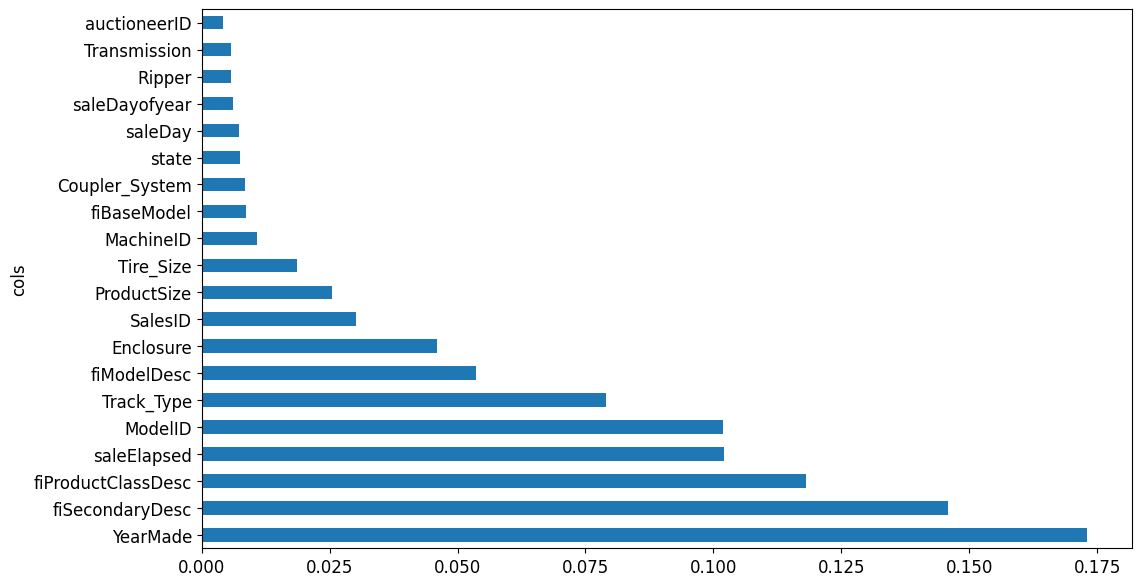

In [86]:
fi_plot(fi[:20]);

In [61]:
to_keep = fi[fi.imp >0.005].cols
len(to_keep)

19

In [62]:
X_train_imp = X_train[to_keep]
X_test_imp = X_test[to_keep]


In [63]:
imp_features = list(to_keep)
imp_features

['YearMade',
 'fiSecondaryDesc',
 'fiProductClassDesc',
 'saleElapsed',
 'ModelID',
 'Track_Type',
 'fiModelDesc',
 'Enclosure',
 'SalesID',
 'ProductSize',
 'Tire_Size',
 'MachineID',
 'fiBaseModel',
 'Coupler_System',
 'state',
 'saleDay',
 'saleDayofyear',
 'Ripper',
 'Transmission']

In [64]:
rf = RandomForestRegressor()
rf.fit(X_train_imp,y_train)

y_test_pred = rf.predict(X_test_imp)

print(r2_score(y_test,y_test_pred))

0.8545608108838217


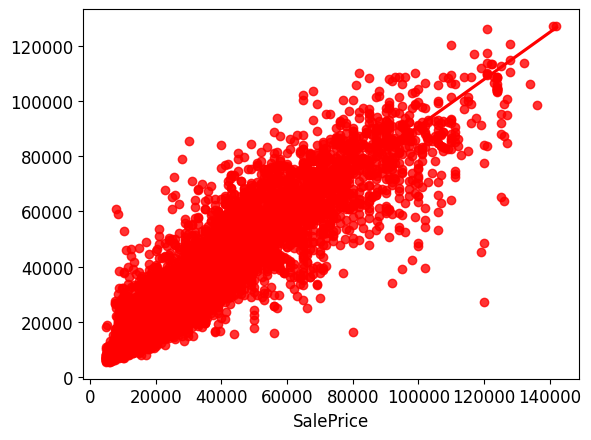

In [65]:
sns.regplot(x=y_test, y=y_test_pred,ci=None, color='red');

In [66]:
y_train_pred = rf.predict(X_train_imp)
print(r2_score(y_train,y_train_pred))

0.9879942666485735


<Axes: xlabel='SalePrice'>

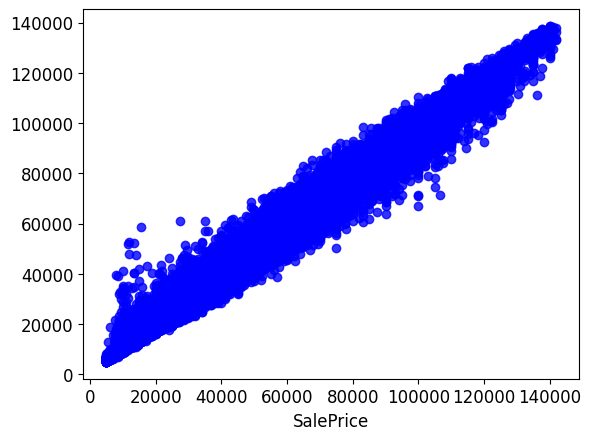

In [67]:
sns.regplot(x=y_train,y=y_train_pred,ci=None, color='blue');

## Out of Domain Data

In [68]:
df_dom = pd.concat([X_train_imp,X_test_imp])
is_valid = np.array([0]*len(X_train_imp) + [1]*len(X_test_imp))

m = RandomForestRegressor()
m.fit(df_dom,is_valid)



RandomForestRegressor()

In [69]:
rf_feature_importance(m,df_dom)

,cols,imp
16,saleDayofyear,0.790627
3,saleElapsed,0.208787
15,saleDay,0.000586
0,YearMade,0.000000
10,Tire_Size,0.000000
17,Ripper,0.000000
14,state,0.000000
13,Coupler_System,0.000000
12,fiBaseModel,0.000000
11,MachineID,0.000000


In [61]:
len(X_test_imp)

1113

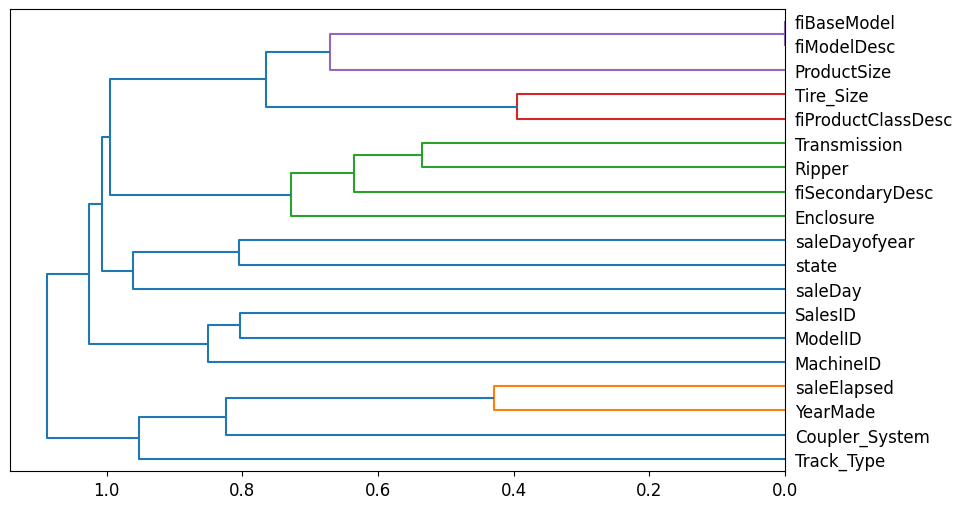

In [72]:

cluster_columns(X_train_imp)

In [79]:
for c in ('saleDayofyear', 'saleElapsed'):
    m = RandomForestRegressor()
    m.fit(X_train_imp.drop(c,axis=1),y_train)
    print(c, r2_score(y_test,m.predict(X_test_imp.drop(c,axis=1))))

saleDayofyear 0.8593833088388212
saleElapsed 0.668865298907375


In [80]:
X_train_final = X_train_imp.drop('saleDayofyear',axis=1)
X_test_final = X_test_imp.drop('saleDayofyear',axis=1)

In [92]:
m = RandomForestRegressor()
m.fit(X_train_final,y_train)


RandomForestRegressor()

0.8406000809800215


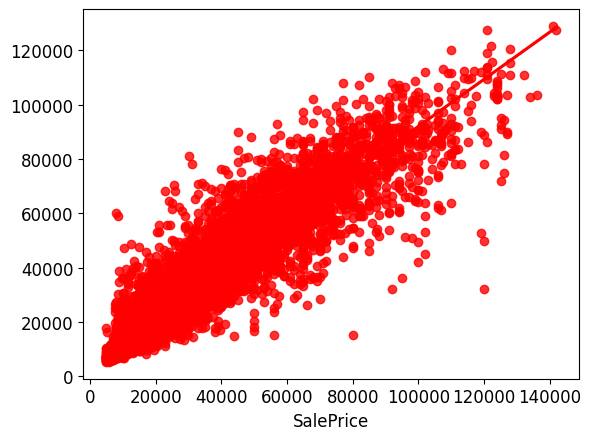

In [93]:
print(r2_score(m.predict(X_test_final), y_test))

sns.regplot(x=y_test, y=m.predict(X_test_final),ci=None, color='red');

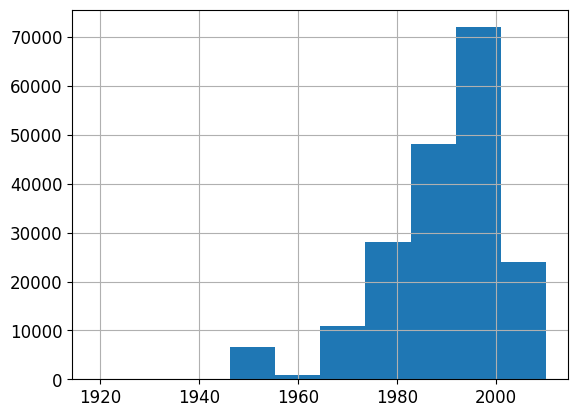

In [87]:
X_train_final['YearMade'].hist();

In [95]:
y_train_pred = m.predict(X_train_final)
print(r2_score(y_train,y_train_pred))

0.987878969554911


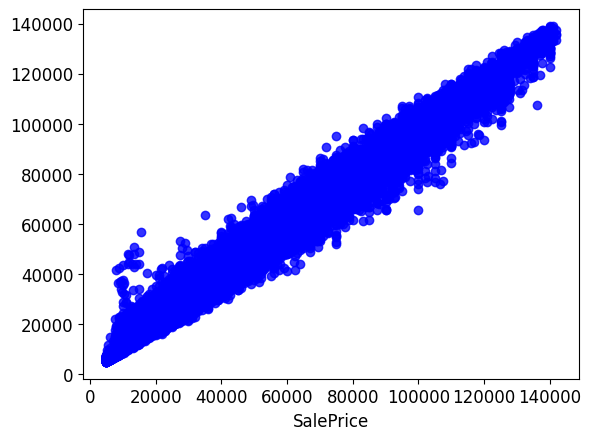

In [97]:
sns.regplot(x=y_train,y=y_train_pred,ci=None, color='blue');


In [99]:
final_features = X_train_final.columns
final_features

Index(['YearMade', 'fiSecondaryDesc', 'fiProductClassDesc', 'saleElapsed',
       'ModelID', 'Track_Type', 'fiModelDesc', 'Enclosure', 'SalesID',
       'ProductSize', 'Tire_Size', 'MachineID', 'fiBaseModel',
       'Coupler_System', 'state', 'saleDay', 'Ripper', 'Transmission'],
      dtype='object')